In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

''

In [8]:
# Reading dataframe
df = pd.read_csv('complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [11]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing narratives
df = df.dropna(subset=['Consumer Complaint Narrative'])

# Drop columns with excessive missing values
df = df.drop(columns=['Sub-issue', 'ZIP Code'], axis=1)


Unnamed: 0     0
product        0
narrative     10
dtype: int64


KeyError: ['Consumer Complaint Narrative']

In [12]:
# Renaming columns
df = df.rename(columns={'narrative':'tweet' })

# Removing SNo column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,product,tweet
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [13]:
# Analysing dataframe attributes
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.dtypes))
print('* Count of different product categories:\n {}\n'.format(df['product'].value_counts()))
print('* Number of NaNs among tweets are: {}\n'.format(df['tweet'].isnull().sum()))

* Size of dataframe: (162421, 2)

* Datatype of columns are:
 product    object
tweet      object
dtype: object

* Count of different product categories:
 product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64

* Number of NaNs among tweets are: 10



In [14]:
# Removing NaNs
df = df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(df['tweet'].isnull().sum(), df.shape))

NaNs are removed from the dataframe. Number of NaNs can be confirmed to be 0. The size of dataframe has reduced to (162411, 2)


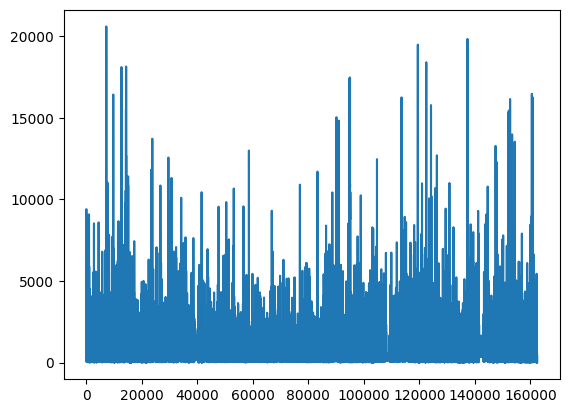

In [15]:
# Plotting word lenghts of tweets
word_length = [len(x) for x in df['tweet']]
plt.plot(word_length)

In [16]:
# Converting sentences to string
df['tweet'] = df['tweet'].astype(str)

In [17]:
# Types of products
df['product'].value_counts()

,count
product,
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
credit_card,15566
retail_banking,13535


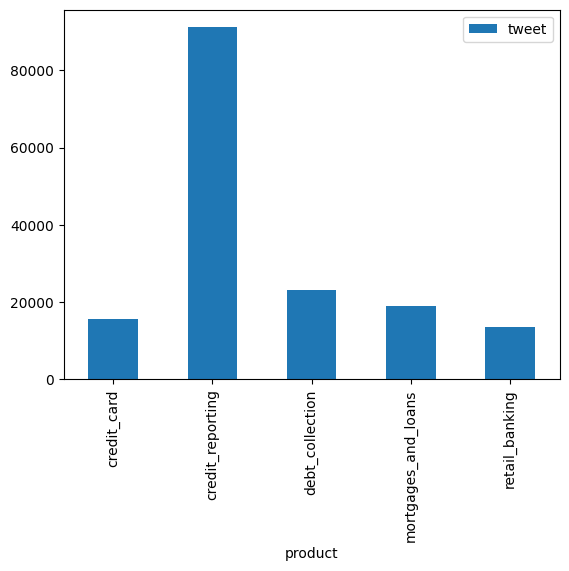

In [18]:
# Plotting product value counts
df.groupby('product').count().plot(kind='bar')
plt.show()

In [21]:
# Bar chart for product distribution
sns.countplot(data=df, x='product')
plt.show()

# Generate a word cloud
from wordcloud import WordCloud

text = " ".join(df['tweet'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


NameError: name 'sns' is not defined

In [23]:
# Importing train test splilt library
from sklearn.model_selection import train_test_split

# Train-Test Splitting
train_data, test_data = train_test_split(df, test_size = 0.20)

In [18]:
# Train and test data dimensions
train_data.shape, test_data.shape

((129928, 2), (32483, 2))

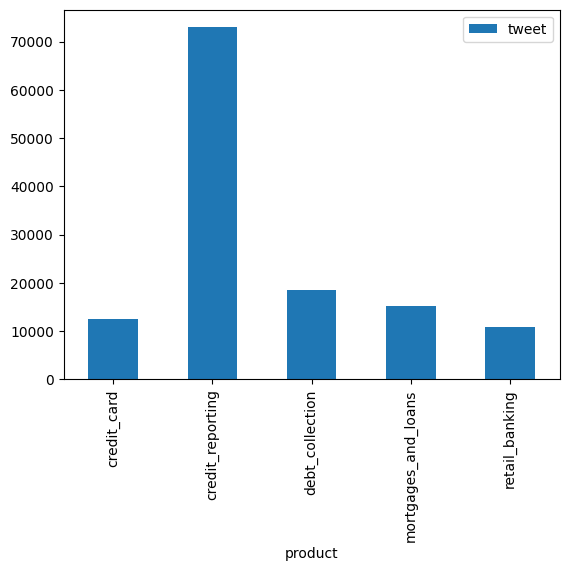

In [24]:
# Balance of train data
train_data.groupby('product').count().plot(kind='bar')
plt.show()

In [25]:
# Train set value counts
train_data.groupby('product').count()


,tweet
product,
credit_card,12438
credit_reporting,72966
debt_collection,18506
mortgages_and_loans,15238
retail_banking,10780


In [26]:
# Randomly selecting 7000 indices in classes with low value count
import numpy as np
to_add_1 = np.random.choice(train_data[train_data['product']=='credit_card'].index,size = 7000,replace=False)
to_add_2 = np.random.choice(train_data[train_data['product']=='debt_collection'].index,size = 7000,replace=False)
to_add_3 = np.random.choice(train_data[train_data['product']=='mortgages_and_loans'].index,size = 7000,replace=False)
to_add_4 = np.random.choice(train_data[train_data['product']=='retail_banking'].index,size=7000,replace=False)

# Indices to be added
to_add = np.concatenate((to_add_1, to_add_2, to_add_3, to_add_4 ))
len(to_add)

28000

In [27]:
# Forming a dataframe for randomly selected indices
df_replicate = train_data[train_data.index.isin(to_add)]
df_replicate

,product,tweet
121475,debt_collection,received incoming call debt collector said rmp...
31772,mortgages_and_loans,receipt servicer letter dated difficulty proce...
110782,credit_card,called chase request credit line increase sinc...
117498,credit_card,bill go well fargo home mortgag account missed...
110733,retail_banking,attempted link pnc bank checking account app w...
...,...,...
147533,retail_banking,u bank reliacard frozen account going two mont...
94699,mortgages_and_loans,last week got contact westlake financial servi...
128163,debt_collection,company attempting reach ex husband explained ...
126317,debt_collection,tcf national bank allowed account opened indiv...


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk import *

In [24]:
# Declaring function for text preprocessing

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('english')
  df_1['tweet'] = df_1['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # remove punctuations and convert to lower case
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))

  # remove double spaces
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1

In [25]:
# Preprocessing training and test data
train_data = preprocess_text(train_data)
test_data = preprocess_text(test_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Verifying text preprocessing
train_data['tweet'].head()

,tweet
121475,received incoming call debt collector said rmp...
40003,decided pull credit every single time would ap...
157218,bought account portfolio recovery associate ll...
31772,receipt servicer letter dated difficulty proce...
769,true identity theft victim identity theft info...


In [30]:
# Declaring train labels
train_labels = train_data['product']
test_labels = test_data['product']

In [31]:
train_labels = train_data['product']
test_labels = test_data['product']

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170
max_words = 2500

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words
tokenizer.fit_on_texts(train_data.tweet)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_data.tweet)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(test_data.tweet)

In [33]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['credit_card' 'credit_reporting' 'debt_collection' 'mortgages_and_loans'
 'retail_banking']
(array([0, 1, 2, 3, 4]), array([12438, 72966, 18506, 15238, 10780]))
(array([0, 1, 2, 3, 4]), array([ 3128, 18206,  4642,  3752,  2755]))


In [34]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170
max_words = 2500

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words
tokenizer.fit_on_texts(train_data.tweet)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_data.tweet)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(test_data.tweet)

In [36]:
# Fixing the sequence length
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
train_data.shape, test_data.shape

((129928, 170), (32483, 170))